### **Assignment 1 Compile Code**
#Done by: Liu Yao Hong G2203319C Email:liuy0220@e.ntu.edu.sg
#Patricia Njo G2205032J  Email:patricia003@e.ntu.edu.sg
#Lam See Hwee G2102084K Email :seehwee001@e.ntu.edu.sg


In [ ]:
!pip install imagetools

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import skimage.color
import skimage.filters
import imagetools as im
import os

## Data Analysis

Creating a normal histogram to give a better insights

In [ ]:
# Mount Google Drive (commented it if  dont require)
from google.colab import drive
drive.mount('/content/drive')

image_directory = '/content/'
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg'))]

# Create a figure for displaying and saving the images and histograms
ax, ax_hist = plt.subplots(len(image_files), 2, figsize=(15, 5 * len(image_files)))
#ax.set_size_inches((18, 6))
ax.tight_layout(pad=3.0)


# Loop through each image file
for i, image_file in enumerate(image_files):
    # Load the image
    imagepath = os.path.join(image_directory, image_file)
    multiimage = cv2.imread(imagepath)

    aximg = ax_hist[i, 0]
    aximg.imshow(cv2.cvtColor(multiimage, cv2.COLOR_BGR2RGB))
    aximg.set_axis_off()
    aximg.set_title(f"Image {i + 1} : {image_file}")

    # Create histogram plot for the entire image
    histogram = cv2.calcHist([multiimage], [0], None, [256], [0, 256])
    axhist = ax_hist[i, 1]
    axhist.plot(histogram, color='k', alpha=0.6)

    axhist.set_title(f'Image {i + 1} Histogram')
    axhist.set_xlabel('Pixel Intensity')
    axhist.set_xlim([0, 256])
    axhist.set_ylabel('No. of Pixel')


plt.show()





Output hidden; open in https://colab.research.google.com to view.

Basic HE

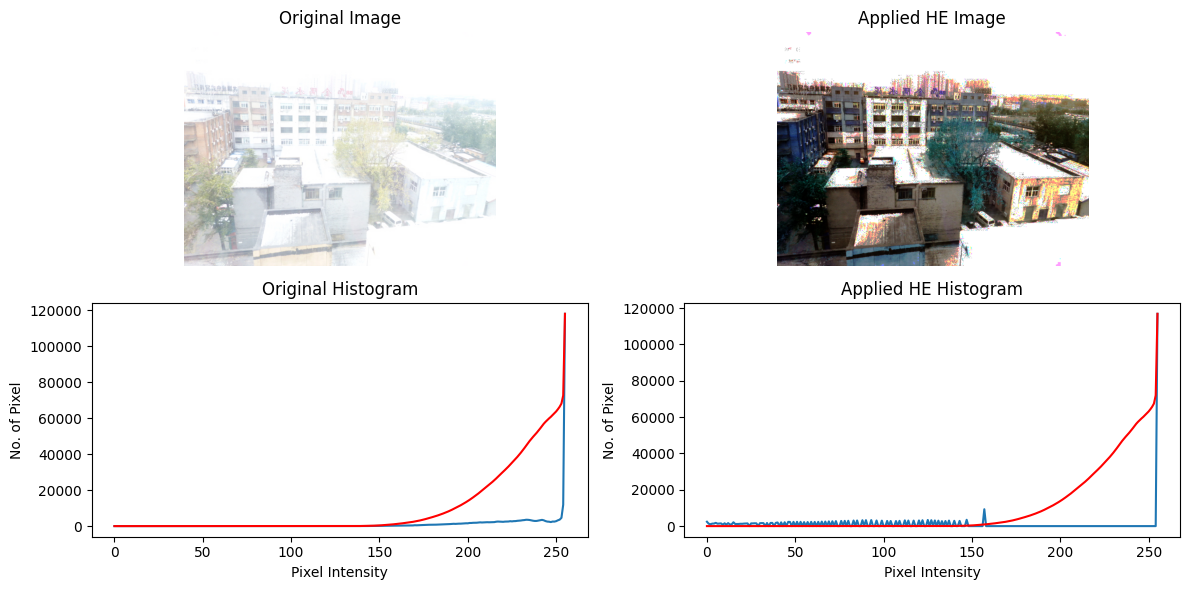

In [ ]:
# Load the colored image
input_image = cv2.imread('sample01.jpg')
# Repeat for sample 6

# Convert the colored image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Compute the histogram of the grayscale image
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Compute the cumulative distribution function (CDF) of the histogram
cdf = hist_original.cumsum()
cdf_normalized = cdf / cdf.max()

# Map the CDF values to a new range
mapping = np.floor(255 * cdf_normalized).astype('uint8')

# Apply the mapping to the original colored image
equalized_red = mapping[input_image[:, :, 0]]
equalized_green = mapping[input_image[:, :, 1]]
equalized_blue = mapping[input_image[:, :, 2]]

# Merge to create the enhanced colored image
enhanced_image = cv2.merge((equalized_blue, equalized_green, equalized_red))

# Compute the histogram of the enhanced grayscale image
hist_enhanced = cv2.calcHist([enhanced_image], [0], None, [256], [0, 256])

# Display the original and enhanced images along with their histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_original)
plt.plot(cdf_normalized * hist_original.max(), color='r')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('No. of Pixel')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Applied HE Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_enhanced)
plt.plot(cdf_normalized * hist_enhanced.max(), color='r')
plt.title('Applied HE Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('No. of Pixel')

plt.tight_layout()
plt.show()

In [ ]:
# Repeat for all 8 sample images

# Define a list of input images
input_images = [
    'sample01.jpg',
    'sample02.jpeg',
    'sample03.jpeg',
    'sample04.jpeg',
    'sample05.jpeg',
    'sample06.jpg',
    'sample07.jpg',
    'sample08.jpg'
]

# Loop through the list of input images
for i, input_image_path in enumerate(input_images, start=1):
    # Load the colored image
    input_image = cv2.imread(input_image_path)

    # Convert the colored image to grayscale
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Compute the histogram of the grayscale image
    hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Compute the cumulative distribution function (CDF) of the histogram
    cdf = hist_original.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Map the CDF values to a new range
    mapping = np.floor(255 * cdf_normalized).astype('uint8')

    # Apply the mapping to the original colored image
    equalized_red = mapping[input_image[:, :, 0]]
    equalized_green = mapping[input_image[:, :, 1]]
    equalized_blue = mapping[input_image[:, :, 2]]

    # Merge to create the enhanced colored image
    enhanced_image = cv2.merge((equalized_blue, equalized_green, equalized_red))

    # Compute the histogram of the enhanced grayscale image
    hist_enhanced = cv2.calcHist([enhanced_image], [0], None, [256], [0, 256])

    # Display the original and enhanced images along with their histograms
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Sample {} - Original Image'.format(i))
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.plot(hist_original)
    plt.plot(cdf_normalized * hist_original.max(), color='r')
    plt.title('Sample {} - Original Histogram'.format(i))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('No. of Pixel')
    plt.legend(['pixel indensity','sk'])

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title('Sample {} - Applied HE Image'.format(i))
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.plot(hist_enhanced)
    plt.plot(cdf_normalized * hist_enhanced.max(), color='r')
    plt.title('Sample {} - Applied HE Histogram'.format(i))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('No. of Pixel')
    plt.legend(['pixel indensity','sk'])

    plt.tight_layout()

    # Save the combined plot as an image
    combined_plot_path = 'combined_plot_sample{:02d}.png'.format(i)
    plt.savefig(combined_plot_path)

    # Show the plot
    plt.show()

    # Close the plot to avoid overlapping plots
    plt.close()

Output hidden; open in https://colab.research.google.com to view.

##RBG


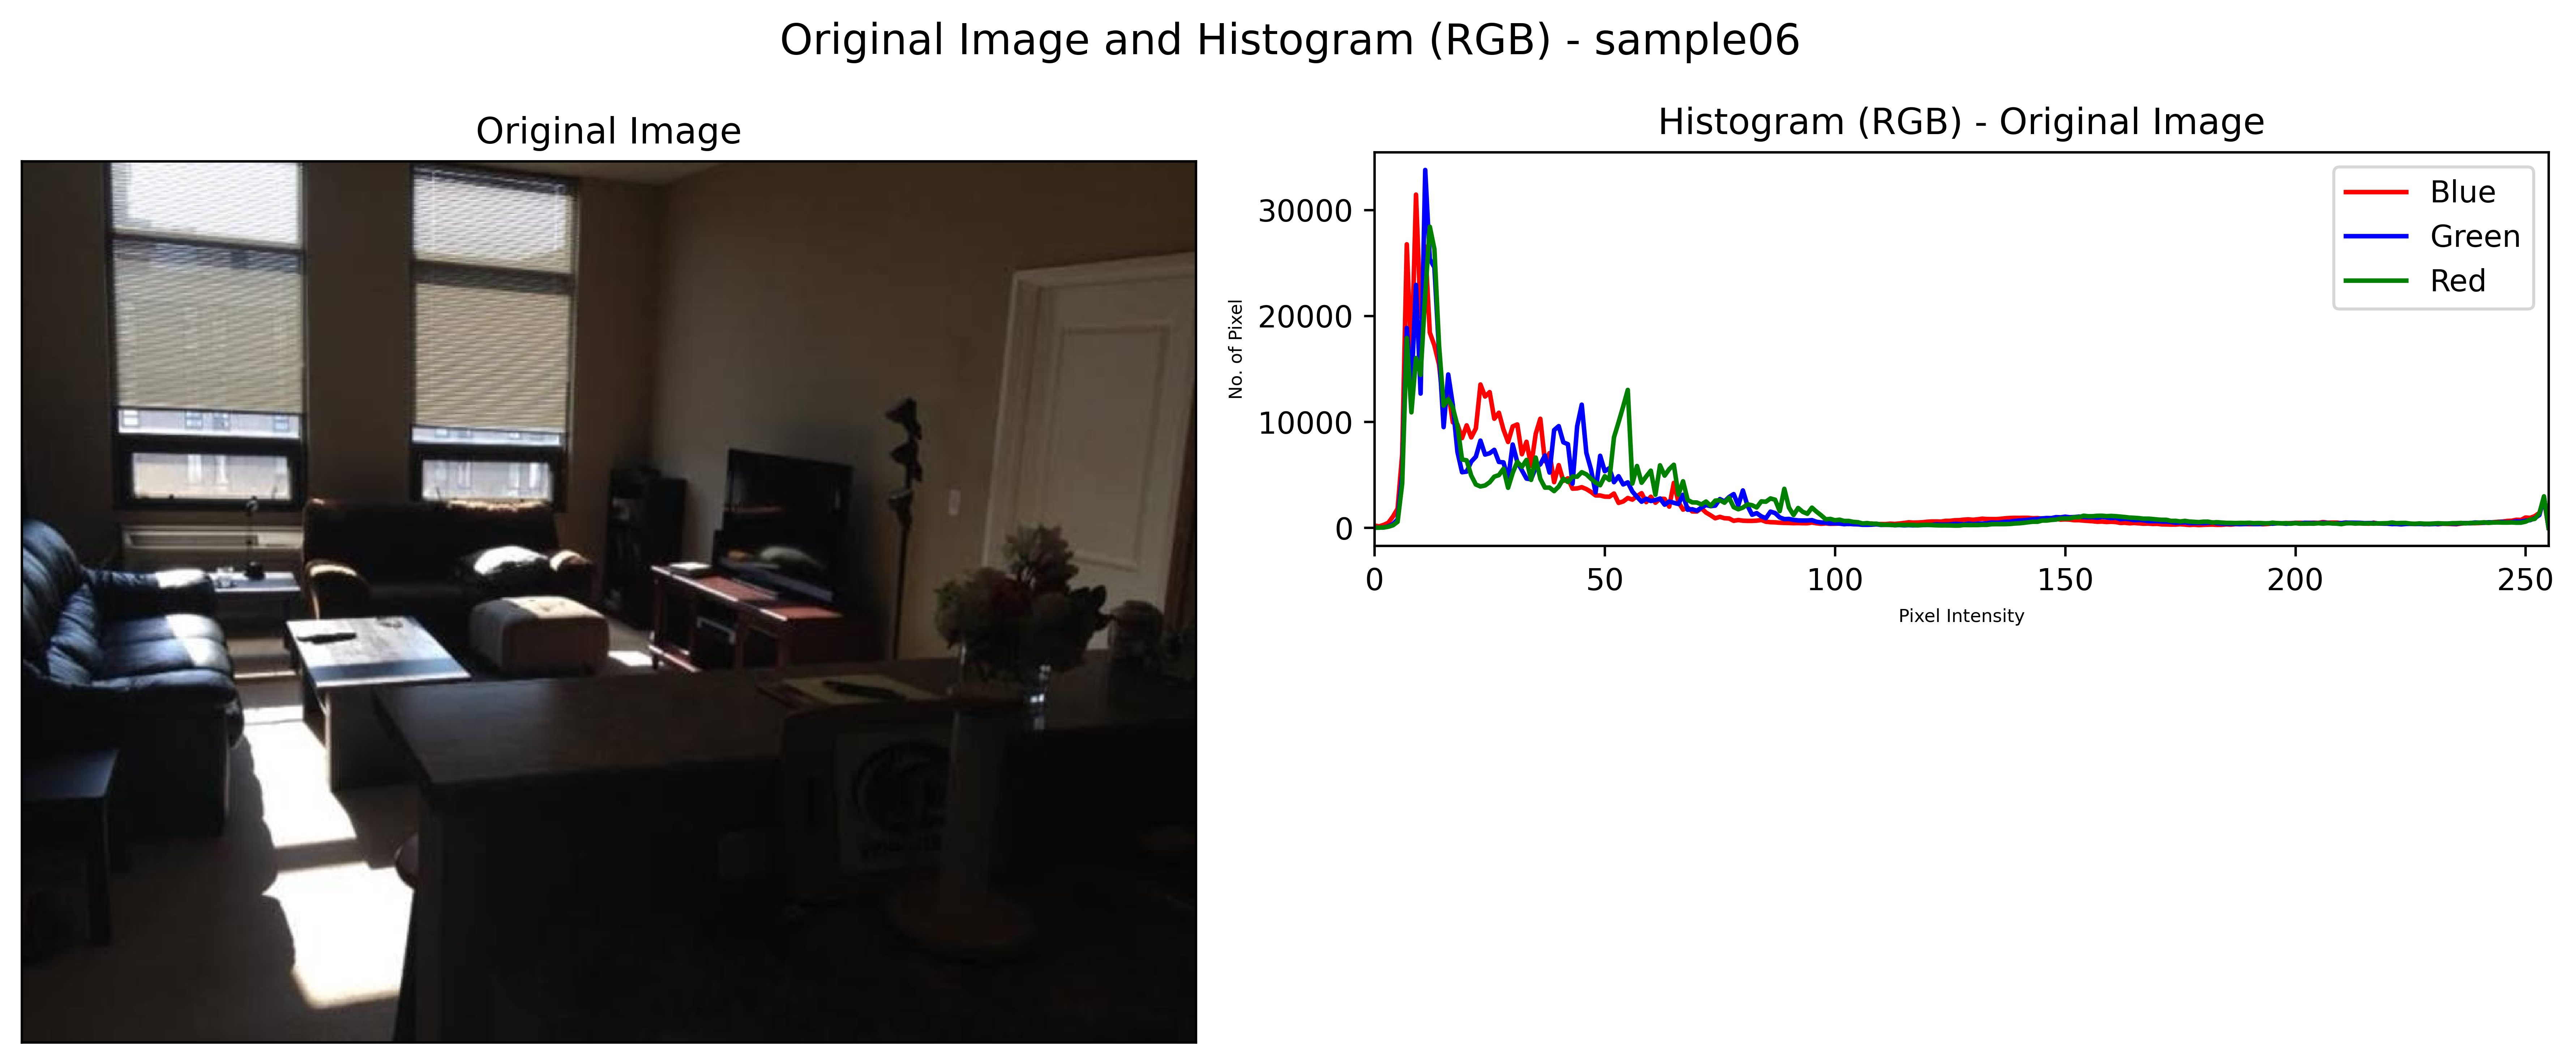

In [ ]:
image = cv2.imread('sample06.jpg')
file_name = 'sample06'

# Split the image into r, G, and B channels
r, b, g = cv2.split(image)

# Calculate the histograms for the original image
## Intensity = 256
blue = cv2.calcHist([b], [0], None, [256], [0, 255])
green= cv2.calcHist([g], [0], None, [256], [0, 255])
red =  cv2.calcHist([r], [0], None, [256], [0, 255])

plt.figure(constrained_layout=False, dpi=600, figsize=(12, 5))
plt.suptitle(f"Original Image and Histogram (RGB) - {file_name}", fontsize=14)

# Display the original image on the left
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image", fontsize=12)

# Plot the histograms on the right
plt.subplot(2, 2, 2)
plt.xlim([0, 255])
plt.plot(red, color='r')
plt.plot(blue, color='b')
plt.plot(green, color='g')
plt.legend(['Blue', 'Green', 'Red'])
plt.title("Histogram (RGB) - Original Image")
plt.xlabel('Pixel Intensity' ,fontsize=6)
plt.ylabel('No. of Pixel',fontsize=6)


plt.tight_layout()
plt.show()


In [ ]:
dict_extend={
        1:'jpg',
        2:'jpeg',
        3:'jpeg',
        4:'jpeg',
        5:'jpeg',
        6:'jpg',
        7:'jpg',
        8:'jpg',
    }
for i in range(1,9):
    #image = cv2.imread('./sample images/sample0'+str(i)+f'.{dict_extend[i]}',1)
    image1 = cv2.imread('sample0'+str(i)+f'.{dict_extend[i]}',1)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    r, b, g = cv2.split(image1)
    blue = cv2.calcHist([b], [0], None, [256], [0, 255])
    green = cv2.calcHist([g], [0], None, [256], [0, 255])
    red = cv2.calcHist([r], [0], None, [256], [0, 255])

    plt.figure(constrained_layout=False, dpi=200, figsize=(6, 3))
    plt.suptitle(f"Original Image and Histogram (RGB)", fontsize=10)

    plt.subplot(1, 2, 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(image1)
    plt.title("Original Image", fontsize=8)

    # Plot the histograms on the right
    plt.subplot(1, 2, 2)
    plt.xlim([0, 255])
    plt.plot(blue, alpha = 0.6, color='b')
    plt.plot(green,alpha = 0.6, color='g')
    plt.plot(red, alpha = 0.6, color='r')

    plt.title("Histogram (RGB)", fontsize=8)
    plt.xlabel('Pixel Intensity',fontsize=6)
    plt.ylabel('No. of Pixel',fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.tick_params(axis='both', which='minor', labelsize=6)
    plt.legend(['Blue (B)', 'Green (G)', 'Red (R)'], fontsize=6)


    plt.tight_layout()
    plt.show()




Output hidden; open in https://colab.research.google.com to view.

## RGB histogram

In [ ]:
## Implementing of HE without using Open Cv2 Function

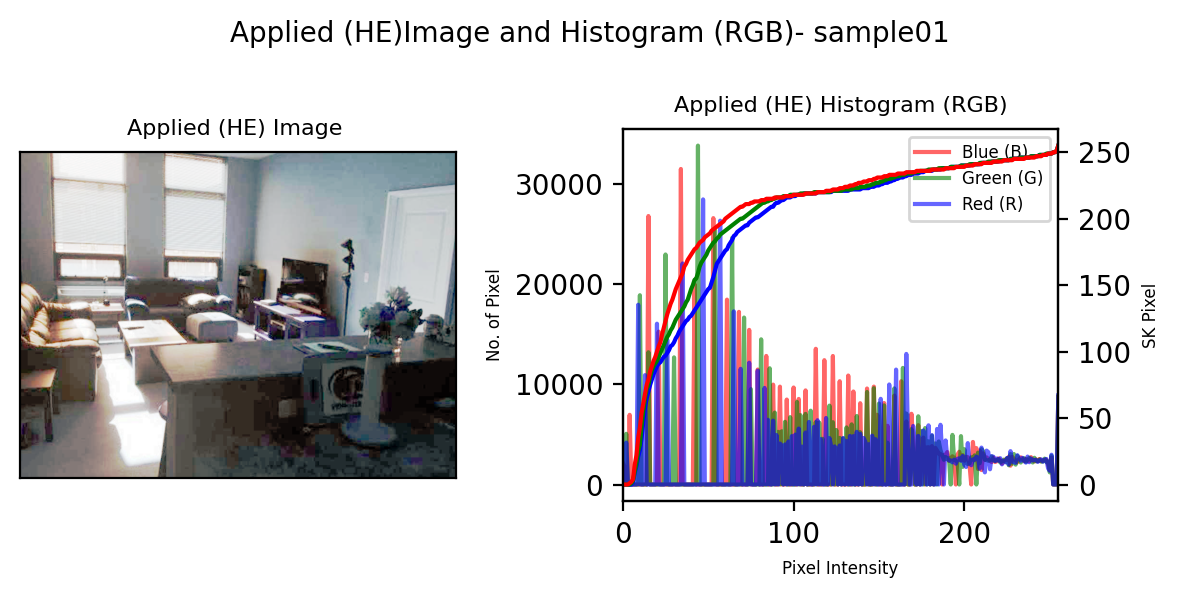

In [ ]:
## Bright image/ Dark images
## changes if required to dark/bright images
#image1 = cv2.imread('sample01.jpg')## Toggle the 8 images.
image1 = cv2.imread('sample06.jpg')## Toggle the 8 images.

## changes if required to dark/bright images
file_name = 'sample01'
#file_name ='sample01'

# Split the image into R, G, and B channels
r, g, b = cv2.split(image1)

hist_blue = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([r], [0], None, [256], [0, 256])


# Cumulative distribution
cdfb = np.cumsum(hist_blue)
cdfg = np.cumsum(hist_green)
cdfr = np.cumsum(hist_red)

L = 256

# Normalize the cdfs for each channel
Ncdf_r = (cdfr / cdfr.max())
Ncdf_r1 = ((cdfr / cdfr.max())) * (L-1)
#Ncdf_g = (cdf_g / cdf_g[-1])
Ncdf_g = (cdfg/cdfg.max())
Ncdf_g1 = (cdfg/cdfg.max())* (L-1)
#Ncdf_b = (cdf_b / cdf_b[-1])
Ncdf_b = (cdfb/cdfb.max())
Ncdf_b1 = (cdfb/cdfb.max())* (L-1)


# Apply the histogram equalization

HE_red = Ncdf_r[r.astype(np.uint8)]
HE_red1= Ncdf_r1[r.astype(np.uint8)]

HE_green = Ncdf_g[g.astype(np.uint8)]
HE_green1 = Ncdf_g1[g.astype(np.uint8)]

HE_blue = Ncdf_b[b.astype(np.uint8)]
HE_blue1 = Ncdf_b1[b.astype(np.uint8)]


# Calculate the equalized histograms

Ehist_red = cv2.calcHist([HE_red], [0], None, [L], [0, L])
Ehist_red1 = cv2.calcHist([HE_red1], [0], None, [L], [0, L])
Ehist_green = cv2.calcHist([HE_green], [0], None, [L], [0, L])
Ehist_green1 = cv2.calcHist([HE_green1], [0], None, [L], [0, L])
Ehist_blue = cv2.calcHist([HE_blue], [0], None, [L], [0, L])
Ehist_blue1 = cv2.calcHist([HE_blue1], [0], None, [L], [0, L])


# Merge the equalized channels
HE_RGB = cv2.merge([HE_blue, HE_green, HE_red])
HE_RGB1 = cv2.merge([HE_blue1, HE_green1, HE_red1])

# Calculatation for the SK lines
sk_blue = ((len(hist_blue) - 1) * Ncdf_b).round()
sk_green = ((len(hist_green) - 1) * Ncdf_g).round()
sk_red = ((len(hist_red) - 1) * Ncdf_r).round()

plt.figure(constrained_layout=False, dpi=200, figsize=(6, 3))
plt.suptitle(f"Applied (HE)Image and Histogram (RGB)- {file_name}", fontsize=10)

# Display the original image on the left
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(HE_RGB, cv2.COLOR_BGR2RGB))
plt.title("Applied (HE) Image ", fontsize=8)

ax1 = plt.subplot(1, 2, 2)
ax1.plot(Ehist_red1, alpha=0.6, color='r')
ax1.plot(Ehist_green1, alpha=0.6, color='g')
ax1.plot(Ehist_blue1, alpha=0.6, color='b')
ax1.set_xlim([0, 255])
ax1.set_xlabel('Pixel Intensity', fontsize=6)
ax1.set_ylabel('No. of Pixel', fontsize=6)
#ax1.tick_params(axis='both', which='major', labelsize=6)
#ax1.tick_params(axis='both', which='minor', labelsize=6)
ax1.set_title("Applied (HE) Histogram (RGB)", fontsize=8)

# SK LINE PLOT
ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis
ax2.plot(sk_blue, color='b', linestyle='-')
ax2.plot(sk_green, color='g', linestyle='-')
ax2.plot(sk_red, color='r', linestyle='-')
ax2.set_ylabel('SK Pixel', fontsize=6)
#ax2.tick_params(axis='both', which='major', labelsize=6)
#ax2.tick_params(axis='both', which='minor', labelsize=6)


ax1.legend(['Blue (B)', 'Green (G)', 'Red (R)'], fontsize=6)

plt.tight_layout()
plt.show()


In [ ]:
# Looping through the whole 8 images.
L = 256
dict_extend={
        1:'jpg',
        2:'jpeg',
        3:'jpeg',
        4:'jpeg',
        5:'jpeg',
        6:'jpg',
        7:'jpg',
        8:'jpg',
    }
for i in range(1,9):
    image = cv2.imread('sample0'+str(i)+f'.{dict_extend[i]}',1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(image)

    hist_blue = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_red = cv2.calcHist([r], [0], None, [256], [0, 256])

    cdfr = np.cumsum(hist_red)
    cdfg = np.cumsum(hist_green)
    cdfb = np.cumsum(hist_blue)

    Ncdf_r = (cdfg / cdfg.max())
    Ncdf_r1 = (cdfr / cdfr.max()) * (L-1)
    Ncdf_g = (cdfg/cdfg.max())
    Ncdf_g1 = (cdfg/cdfg.max())* (L-1)
    Ncdf_b = (cdfb/cdfb.max())
    Ncdf_b1 = (cdfb/cdfb.max())* (L-1)

    HE_red = Ncdf_r[r.astype(np.uint8)]
    HE_red1= Ncdf_r1[r.astype(np.uint8)]

    HE_green = Ncdf_g[g.astype(np.uint8)]
    HE_green1 = Ncdf_g1[g.astype(np.uint8)]

    HE_blue = Ncdf_b[b.astype(np.uint8)]
    HE_blue1 = Ncdf_b1[b.astype(np.uint8)]

    Ehist_red = cv2.calcHist([HE_red], [0], None, [L], [0, L])
    Ehist_red1 = cv2.calcHist([HE_red1], [0], None, [L], [0, L])

    Ehist_green = cv2.calcHist([HE_green], [0], None, [L], [0, L])
    Ehist_green1 = cv2.calcHist([HE_green1], [0], None, [L], [0, L])

    Ehist_blue = cv2.calcHist([HE_blue], [0], None, [L], [0, L])
    Ehist_blue1 = cv2.calcHist([HE_blue1], [0], None, [L], [0, L])

    HE_RGB = cv2.merge([HE_blue, HE_green, HE_red])
    HE_RGB1 = cv2.merge([HE_blue1, HE_green1, HE_red1])

    sk_blue = ((len(hist_blue) - 1) * Ncdf_b).round()
    sk_green = ((len(hist_green) - 1) * Ncdf_g).round()
    sk_red = ((len(hist_red) - 1) * Ncdf_r).round()

    plt.figure(constrained_layout=False, dpi=200, figsize=(6, 3))
    plt.suptitle(f"Applied (HE)Image and Histogram (RGB)- {file_name}", fontsize=10)

    # Display the original image on the left
    plt.subplot(1, 2, 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(cv2.cvtColor(HE_RGB, cv2.COLOR_BGR2RGB))
    plt.title("Applied (HE) Image ", fontsize=8)

    ax1 = plt.subplot(1, 2, 2)
    ax1.plot(Ehist_red1, alpha=0.6, color='r')
    ax1.plot(Ehist_green1, alpha=0.6, color='g')
    ax1.plot(Ehist_blue1, alpha=0.6, color='b')
    ax1.set_xlim([0, 255])
    ax1.set_xlabel('Pixel Intensity', fontsize=6)
    ax1.set_ylabel('No. of Pixel', fontsize=6)
    #ax1.tick_params(axis='both', which='major', labelsize=6)
    #ax1.tick_params(axis='both', which='minor', labelsize=6)
    ax1.set_title("Applied (HE) Histogram (RGB)", fontsize=8)
    #ax1.legend(['Blue (B)', 'Green (G)', 'Red (R)',], fontsize=6)

    # SK line plot
    ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis
    ax2.plot(sk_blue, color='b', linestyle='-')
    ax2.plot(sk_green, color='g', linestyle='-')
    ax2.plot(sk_red, color='r', linestyle='-')
    ax2.set_ylabel('SK Pixel', fontsize=6)
    #ax2.tick_params(axis='both', which='major', labelsize=6)
    #ax2.tick_params(axis='both', which='minor', labelsize=6)
    ax1.legend(['SK (B)', 'SK (G)', 'SK (R)'], fontsize=6)


    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## with CV.
##cv2.equalizeHist

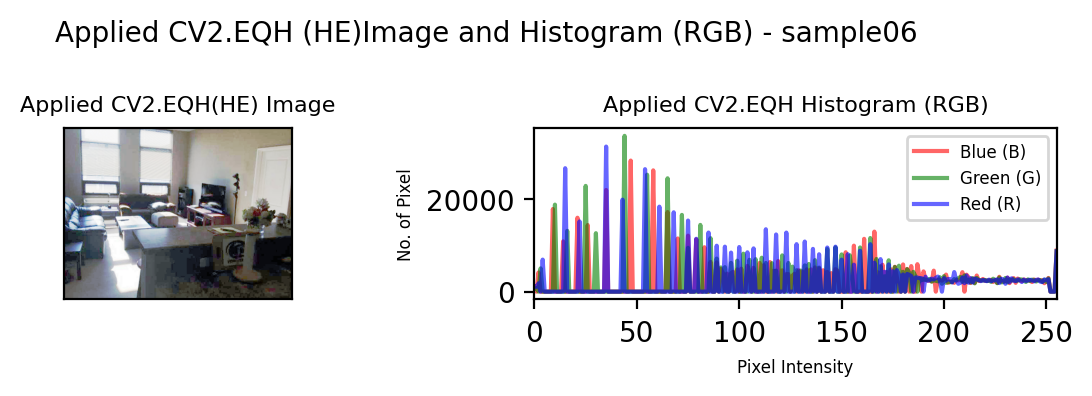

In [21]:
## Bright Image
image3 = cv2.imread('sample06.jpg')
file_name3 = 'sample06'

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Split the image into R, G, and B channels
b, g, r = cv2.split(image3)

# Apply CV2.equalizeHist()
HE_blue = cv2.equalizeHist(b)
HE_green = cv2.equalizeHist(g)
HE_red = cv2.equalizeHist(r)

# Merge back to RGB
HE_RGB = cv2.merge([HE_blue, HE_green, HE_red])

HEhist_red = cv2.calcHist([HE_red], [0], None, [256], [0, 256])
HEhist_green = cv2.calcHist([HE_green], [0], None, [256], [0, 256])
HEhist_blue = cv2.calcHist([HE_blue], [0], None, [256], [0, 256])

plt.figure(constrained_layout=False, dpi=200, figsize=(6, 3))
plt.suptitle(f"Applied CV2.EQH (HE)Image and Histogram (RGB) - {file_name3}", fontsize=10)

# Display the original image on the left
plt.subplot(2, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title("Applied CV2.EQH(HE) Image", fontsize=8)
plt.imshow(cv2.cvtColor(HE_RGB, cv2.COLOR_BGR2RGB))

# Plot the histograms on the right
plt.subplot(2, 2, 2)
plt.plot(HEhist_red, alpha=0.6 ,color='r')
plt.plot(HEhist_green, alpha=0.6 ,color='g')
plt.plot(HEhist_blue, alpha=0.6 , color='b')
plt.xlim([0, 255])

# Legend
plt.legend(['Blue (B)', 'Green (G)', 'Red (R)'], fontsize=6)
plt.title("Applied CV2.EQH Histogram (RGB)", fontsize=8)
plt.xlabel('Pixel Intensity',fontsize=6)
plt.ylabel('No. of Pixel',fontsize=6)

plt.tight_layout()
plt.show()



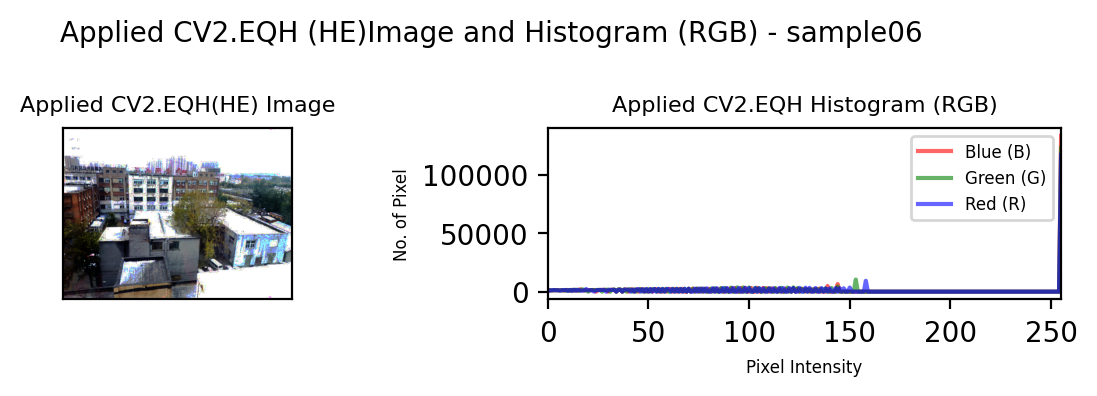

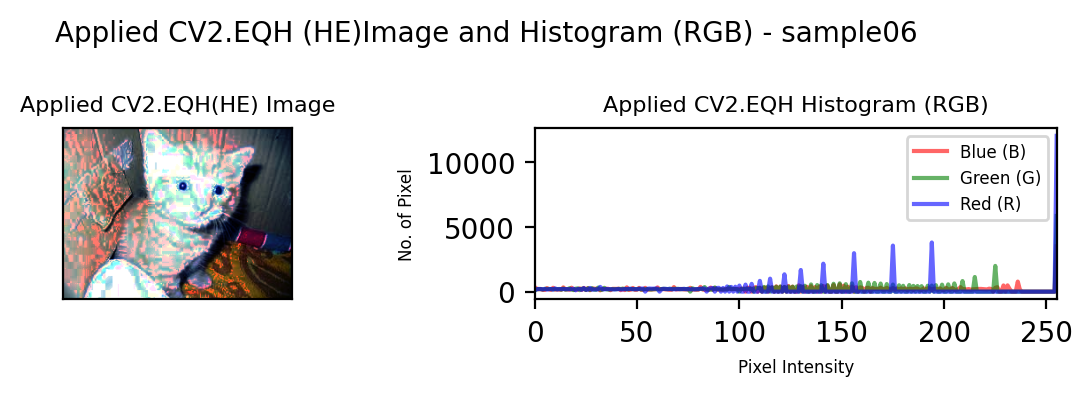

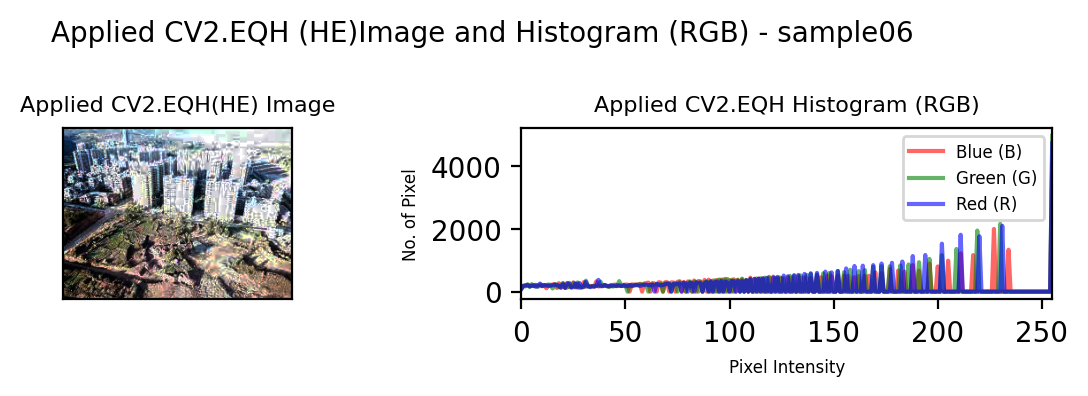

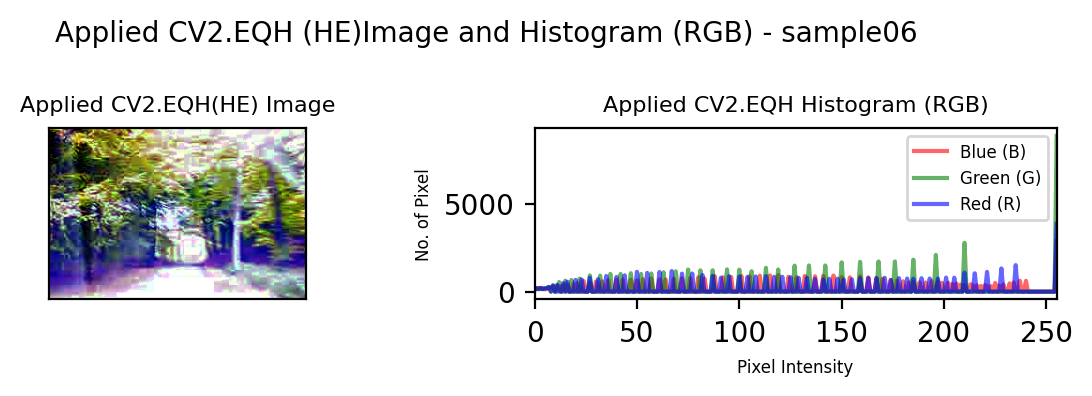

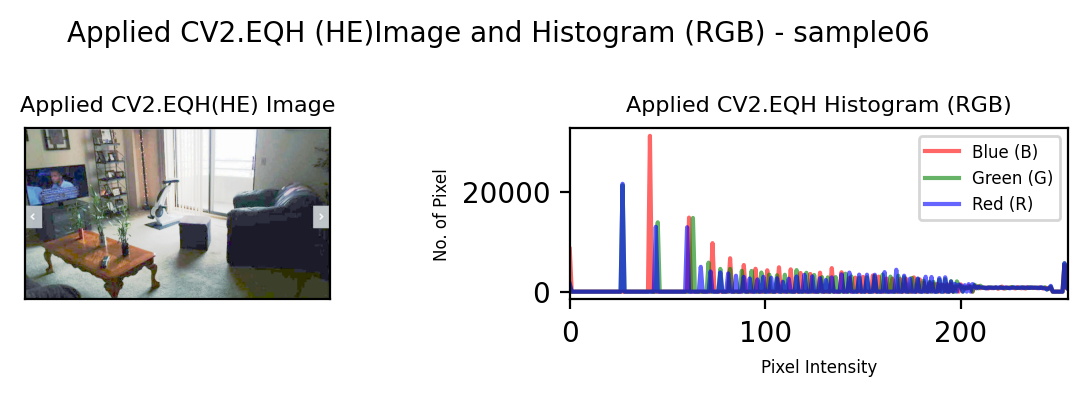

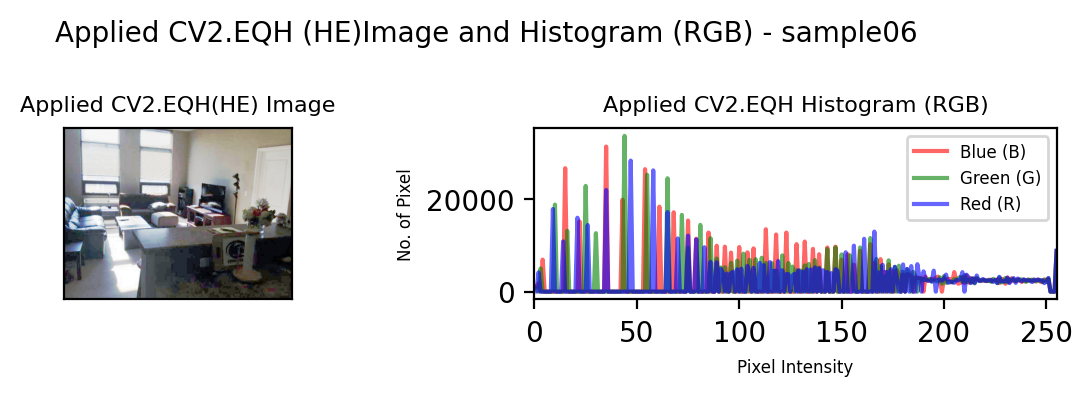

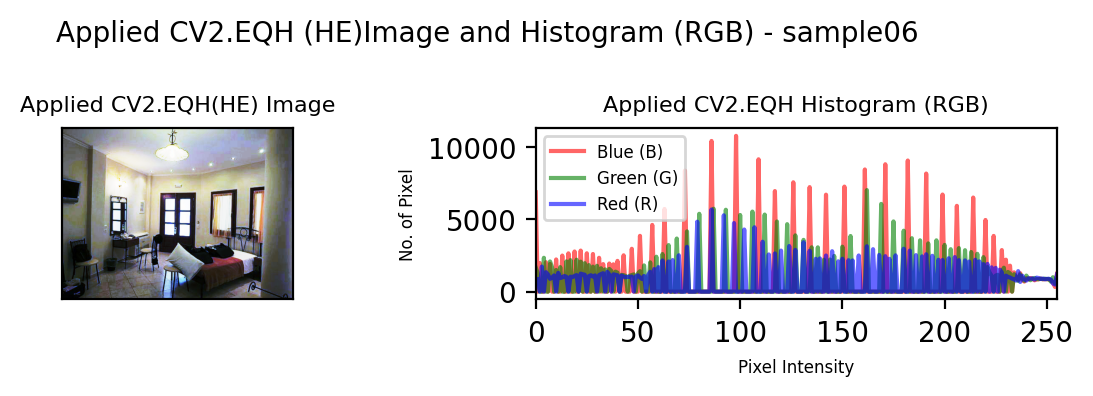

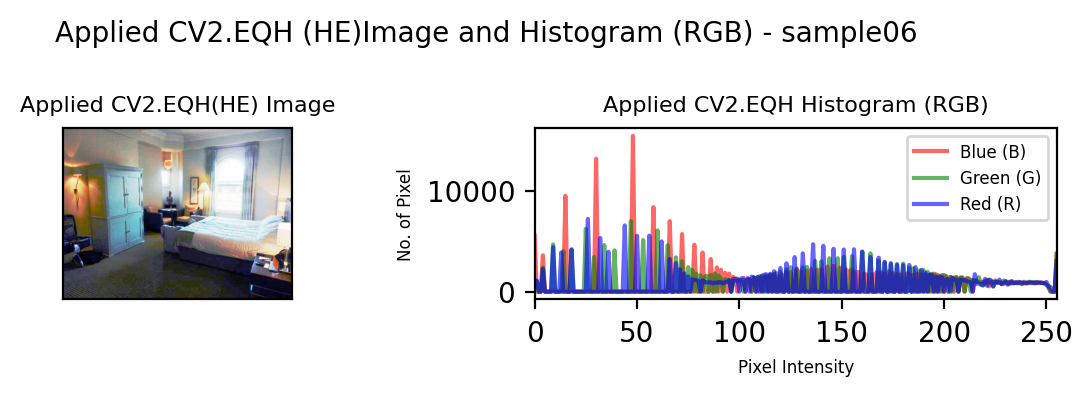

In [29]:
# Looping through the whole 8 images.
L = 256
dict_extend={
        1:'jpg',
        2:'jpeg',
        3:'jpeg',
        4:'jpeg',
        5:'jpeg',
        6:'jpg',
        7:'jpg',
        8:'jpg',
    }
for i in range(1,9):
    image = cv2.imread('sample0'+str(i)+f'.{dict_extend[i]}',1)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    b, g, r = cv2.split(image)

    HE_blue = cv2.equalizeHist(b)
    HE_green = cv2.equalizeHist(g)
    HE_red = cv2.equalizeHist(r)

    HE_RGB = cv2.merge([HE_red, HE_green, HE_blue])

    HEhist_red = cv2.calcHist([HE_red], [0], None, [256], [0, 256])
    HEhist_green = cv2.calcHist([HE_green], [0], None, [256], [0, 256])
    HEhist_blue = cv2.calcHist([HE_blue], [0], None, [256], [0, 256])

    plt.figure(constrained_layout=False, dpi=200, figsize=(6, 3))
    plt.suptitle(f"Applied CV2.EQH (HE)Image and Histogram (RGB) - {file_name3}", fontsize=10)

    # Display the original image on the left
    plt.subplot(2, 2, 1)
    plt.xticks([]), plt.yticks([])
    plt.title("Applied CV2.EQH(HE) Image", fontsize=8)
    plt.imshow(cv2.cvtColor(HE_RGB, cv2.COLOR_BGR2RGB))

    # Plot the histograms on the right
    plt.subplot(2, 2, 2)
    plt.xlim([0, 255])
    plt.plot(HEhist_red, alpha=0.6 ,color='r')
    plt.plot(HEhist_green, alpha=0.6 ,color='g')
    plt.plot(HEhist_blue, alpha=0.6 , color='b')

      # Legend
    plt.legend(['Blue (B)', 'Green (G)', 'Red (R)'], fontsize=6)
    plt.title("Applied CV2.EQH Histogram (RGB)", fontsize=8)
    plt.xlabel('Pixel Intensity',fontsize=6)
    plt.ylabel('No. of Pixel',fontsize=6)

    plt.tight_layout()
    plt.show()





## YUV

In [ ]:
dict_extend={
        1:'jpg',
        2:'jpeg',
        3:'jpeg',
        4:'jpeg',
        5:'jpeg',
        6:'jpg',
        7:'jpg',
        8:'jpg',
    }
for i in range(1,9):
    #image = cv2.imread('./sample images/sample0'+str(i)+f'.{dict_extend[i]}',1)
    image = cv2.imread('sample0'+str(i)+f'.{dict_extend[i]}',1)

    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(img_yuv)
    #open cv
    eq_yuv1 = cv2.equalizeHist(y)
    #my YUV Hist
    hist1, bins=np.histogram(y.flatten(),bins=256,range=[0,256])
    cdf=hist1.cumsum()
    pr=cdf/cdf.max()
    #Equalized Hist
    sk=((len(hist1)-1)*pr).round()
    y_eq = sk[y]

    fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
    #plt.title(f'Orignal Image and Histogram(YUV-Y)-sample0{str(i)}')
    im = ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.title.set_text('Original image')
    ax_hist.hist(y.flat,bins=100,label='brightness',color='orange', alpha=0.6)
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_ylabel('No. of Pixels')
    ax_hist.set_xlim(0,255)
    ax_hist.title.set_text('Histogram(YUV-Y)')

    #plt.savefig('oringalimage0'+str(i)+'.png')

    plt.show()

    fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
    y_eq =y_eq.astype(np.uint8)
    image_eq=cv2.merge((y_eq,u,v))
    ax.imshow(cv2.cvtColor(image_eq, cv2.COLOR_YUV2RGB))
    ax.title.set_text('Applied(HE) YUV image')
    ax_hist.hist(y_eq.flat,bins=100,label='brightness',color='orange', alpha=0.6)
    ax_hist.set_xlabel('pixel intensity')
    ax_hist.set_ylabel('No. of Pixels')
    ax_hist.set_xlim(0,255)
    ax_hist.title.set_text('HE Histogram(YUV-Y)')
    ax2= ax_hist.twinx()
    ax2.plot(sk,label='sk',color='m', alpha=0.6)
    ax2.set_ylabel('sk pixel')
    ax2.set_ylim(0,255)
    plt.legend(loc='upper left')
   # plt.title(f'Applied(HE) YUV Image and Histogram(YUV-Y)-sample0{str(i)}')
    #plt.savefig('myHEimage0'+str(i)+'.png')

    plt.show()

    fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
    image_cveq=cv2.merge((eq_yuv1,u,v))
    ax.imshow(cv2.cvtColor(image_cveq, cv2.COLOR_YUV2RGB))
    ax.title.set_text('Applied CV2.EQH(HE) YUV image')
    ax_hist.hist(eq_yuv1.flat,bins=100,label='brightness',color='orange', alpha=0.6)
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_ylabel('No. of Pixels')
    ax_hist.set_xlim(0,255)
    ax_hist.title.set_text('HE Histogram(YUV-Y)')
   # plt.title(f'Applied CV2.HEQ(HE) YUV Image and Histogram(YUV-Y)-sample0{str(i)}')
    #plt.savefig('CVHEimage0'+str(i)+'.png')
    plt.show()
#     ax2= ax.twinx()
#     ax2.plot(sk,label='sk',color='m', alpha=0.6)
#     ax2.set_ylabel('sk pixel')
#     ax2.set_ylim(0,255)
#     ax_hist.hist(eq_yuv1.flatten(),bins=100,label='brightness',color='b', alpha=0.6)
#     ax_hist.set_xlabel('pixel intensity')
#     ax_hist.set_ylabel('NO.pixels')
#     ax_hist.set_xlim(0,255)
#     ax_hist.title.set_text('OpenCV HE Histgram(YUV)')
#     plt.legend(loc='upper left')
#     fig.savefig('sample0'+str(i)+'histgrame.png')
#     plt.show()
#     y_eq =y_eq.astype(np.uint8)
#     image_eq=cv2.merge((y_eq,u,v))
#     plt.imshow(cv2.cvtColor(image_eq, cv2.COLOR_YUV2RGB))
#     pyplot.title('',
#     plt.savefig('myHEimage0'+str(i)+'.png')
#     plt.show()
#     image_eq=cv2.merge((y_eq,u,v))
#     plt.imshow(cv2.cvtColor(image_eq, cv2.COLOR_YUV2RGB))
#     plt.savefig('CVHEimage0'+str(i)+'.png')
#     plt.show()

Output hidden; open in https://colab.research.google.com to view.

## CLAHE

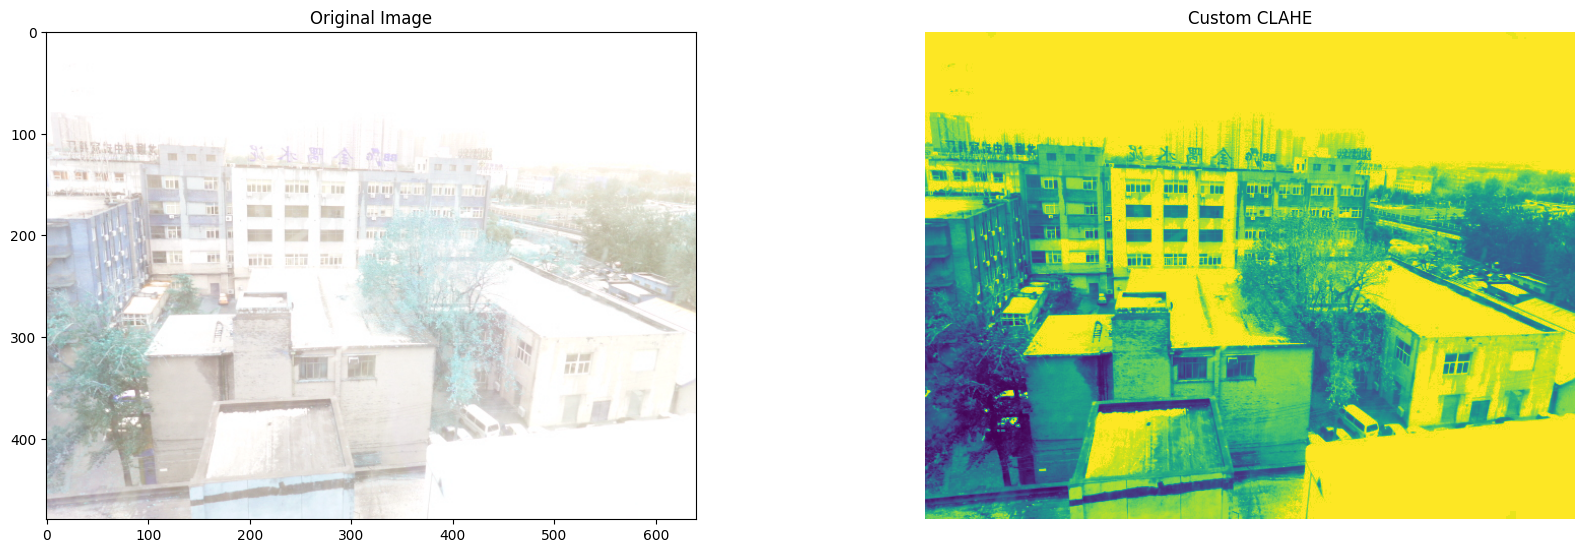

In [ ]:
## Testing with Gray scale images

image = cv2.imread('sample01.jpg' )

imageYUV = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=8, tileGridSize=(2, 2))
custom_y = clahe.apply(imageYUV)

fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
#fig, axes = plt.subplots(1, 2)
fig.set_size_inches((18, 6))
fig.tight_layout(pad=3.0)


ax.set_title("Original Image")
ax.imshow(image)
ax_hist.set_title("Custom CLAHE")
ax_hist.imshow(custom_y)

ax_hist.axis('off')

# Show the images
plt.show()

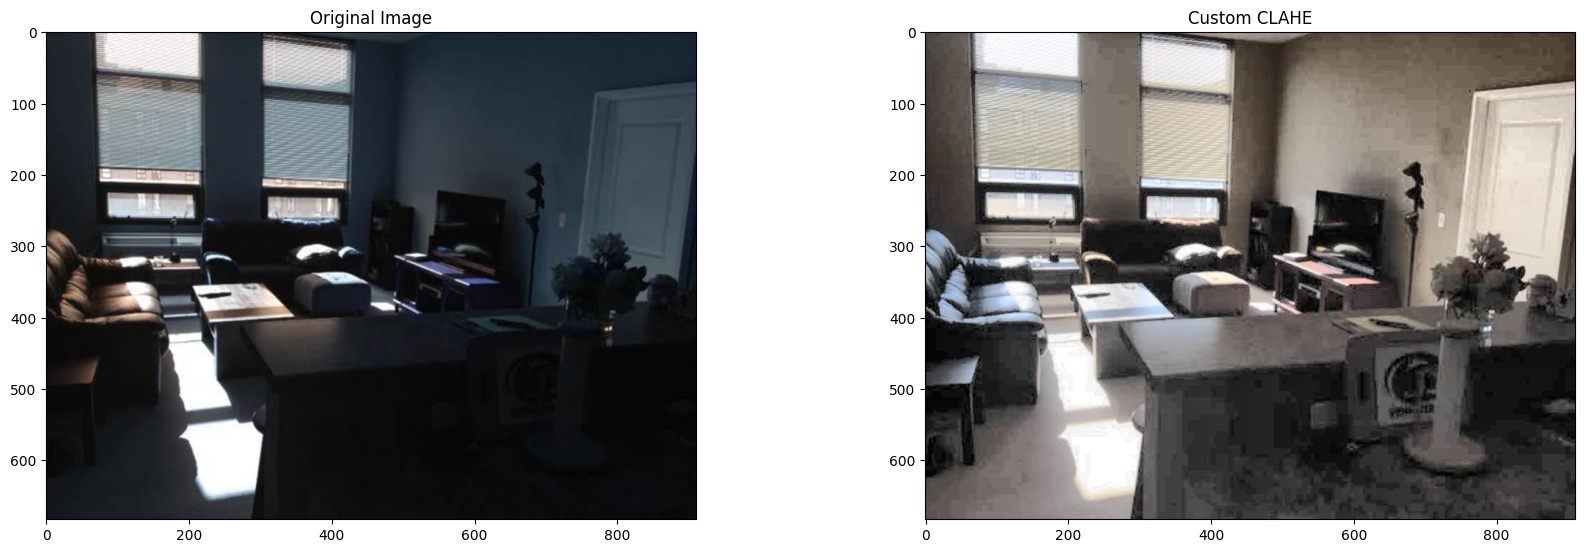

In [ ]:
#### YUV to RGB
#image = cv2.imread('sample01.jpg' )
image = cv2.imread('sample06.jpg' )

imageBgr2yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(imageBgr2yuv)

own_clahe = cv2.createCLAHE(clipLimit=8, tileGridSize=(2, 2))
custom_y = own_clahe.apply(y)

yuvclahe = cv2.merge((custom_y, u, v))
rgbchlahe = cv2.cvtColor(yuvclahe, cv2.COLOR_YUV2RGB)

fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
#fig, axes = plt.subplots(1, 2)
fig.set_size_inches((18, 6))
fig.tight_layout(pad=3.0)

ax.set_title("Original Image")
ax.imshow(image)
ax_hist.set_title("Custom CLAHE")
ax_hist.imshow(rgbchlahe)


# Show the images
plt.show()

In [ ]:
dict_extend={
        1:'jpg',
        2:'jpeg',
        3:'jpeg',
        4:'jpeg',
        5:'jpeg',
        6:'jpg',
        7:'jpg',
        8:'jpg',
    }
for i in range(1,9):
    #image = cv2.imread('./sample images/sample0'+str(i)+f'.{dict_extend[i]}',1)
    image = cv2.imread('sample0'+str(i)+f'.{dict_extend[i]}',1)
    imageBgr2yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #imageBgr2yuv = cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
    y, u, v = cv2.split(imageBgr2yuv)

    own_clahe = cv2.createCLAHE(clipLimit=8, tileGridSize=(2, 2))
    custom_y = own_clahe.apply(y)

    yuvclahe = cv2.merge((custom_y, u, v))
    rgbchlahe = cv2.cvtColor(yuvclahe, cv2.COLOR_YUV2RGB)
    #rgbchlahe = cv2.cvtColor(yuvclahe, cv2.COLOR_BGR2YUV)

    fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
    #fig, axes = plt.subplots(1, 2)
    fig.set_size_inches((18, 6))
    fig.tight_layout(pad=3.0)

    ax.set_title("Original Image")
    ax.imshow(image)
    ax_hist.set_title("Custom CLAHE")
    ax_hist.imshow(rgbchlahe)


    # Show the images
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

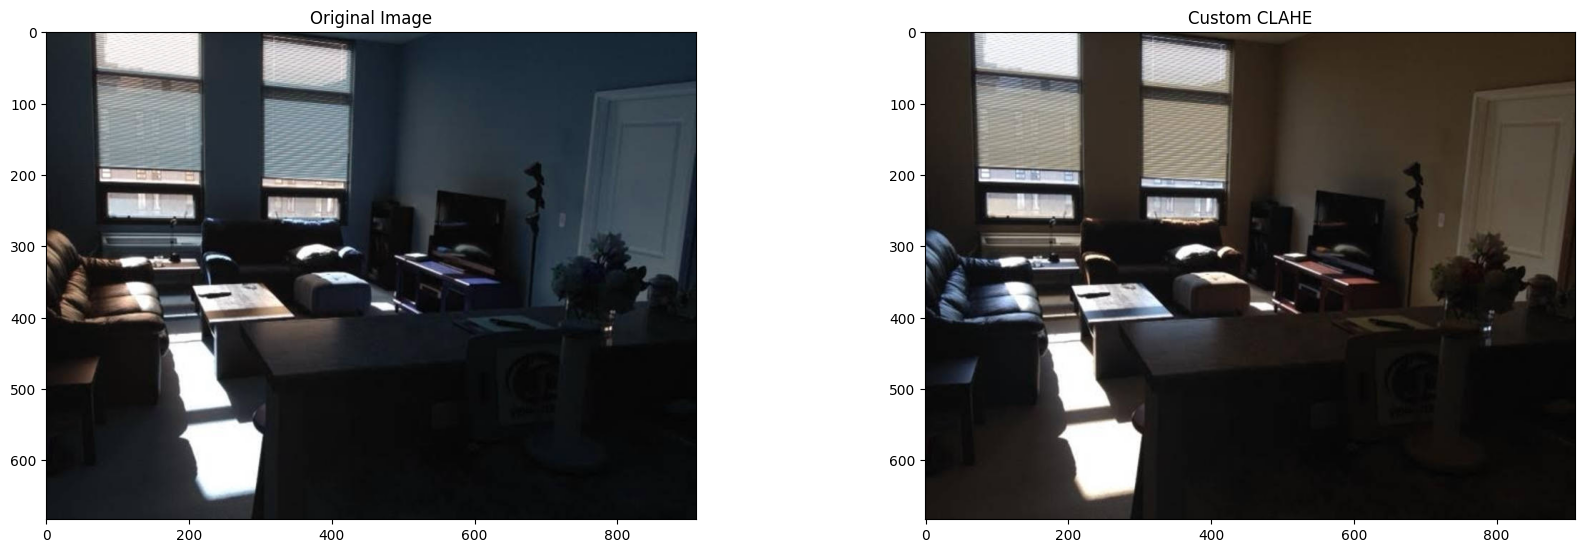

In [ ]:
## YUV TO RGB
#image = cv2.imread('sample01.jpg' )
image = cv2.imread('sample06.jpg' )

#imageBgr2yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
imageBgr2yuv = cv2.cvtColor(image, cv2.COLOR_YUV2RGB)
y, u, v = cv2.split(imageBgr2yuv)

own_clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
custom_y = own_clahe.apply(y)

#yuvclahe = cv2.merge((custom_y, u, v))
#rgbchlahe = cv2.cvtColor(yuvclahe, cv2.COLOR_YUV2RGB)
rgbchlahe = cv2.cvtColor(imageBgr2yuv, cv2.COLOR_BGR2YUV)

fig,(ax, ax_hist) = plt.subplots(1,2,figsize=(12, 4))
#fig, axes = plt.subplots(1, 2)
fig.set_size_inches((18, 6))
fig.tight_layout(pad=3.0)

ax.set_title("Original Image")
ax.imshow(image)
ax_hist.set_title("Custom CLAHE")
ax_hist.imshow(rgbchlahe)


# Show the images
#plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
## Future work to solve the own creation of the CLAHE without using the cv2 function

In [ ]:
def clahe(image, clip_limit=2.0, grid_size=(1, 1)):
    overlap_percentage=0.01
    # Calculate the size of each tile
    height, width = image.shape
    tile_height = height // grid_size[0]
    tile_width = width // grid_size[1]
    print(tile_height,tile_width)
    # Initialize an output image
    output_image = np.zeros_like(image)

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Define the coordinates for the current tile
            y_start = max(0, i * tile_height - int(tile_height * overlap_percentage))
            y_end = min(height, (i + 1) * tile_height + int(tile_height * overlap_percentage))
            x_start = max(0, j * tile_width - int(tile_width * overlap_percentage))
            x_end = min(width, (j + 1) * tile_width + int(tile_width * overlap_percentage))
            border_size=10
            # Extract the current tile
            tile = image[y_start:y_end, x_start:x_end]
            if y_start==0:
                tile = cv2.copyMakeBorder(tile, border_size, 0, 0, 0, cv2.BORDER_REFLECT)
            if y_end==0:
                tile = cv2.copyMakeBorder(tile, 0, border_size, 0, 0,cv2.BORDER_REFLECT)
            if x_start==0:
                tile = cv2.copyMakeBorder(tile, 0, 0, border_size, 0, cv2.BORDER_REFLECT)
            if x_end==0:
                tile = cv2.copyMakeBorder(tile, 0, 0, 0, border_size, cv2.BORDER_REFLECT)
            # Apply histogram equalization to the tile
            equalized_tile = cv2.equalizeHist(tile)

            #print(equalized_tile.shape)
            if y_start==0:
                tile = tile[border_size:,:]
                equalized_tile=equalized_tile[border_size:,:]
            if y_end==0:
                tile = tile[:-border_size,:]
                equalized_tile=equalized_tile[:-border_size,:]
            if x_start==0:
                tile = tile[:,border_size:]
                equalized_tile=equalized_tile[:,border_size:]
            if x_end==0:
                tile = tile[:,:-border_size]
                equalized_tile=equalized_tile[:,:-border_size]
            #print(tile.shape)
            # Place the equalized tile into the output image
            output_image[y_start:y_end, x_start:x_end] = equalized_tile


    return output_image

# Example usage:
#input_image = cv2.imread('./sample images/sample01.jpg', cv2.IMREAD_GRAYSCALE)
own_clahe_yuv1 = clahe(y)
own_clahe_img = cv2.merge((own_clahe_yuv1,u,v))
own_clahe_img = cv2.cvtColor(own_clahe_img, cv2.COLOR_YUV2RGB)
plt.imshow(own_clahe_img)